# Сборный проект: игры

## Обзор данных
### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Путь к файлу: `/datasets/games.csv`.


Исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Подготовка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/games.csv')

In [2]:
# основная информация о датафрейме
df.info() 

# первые 10 строк
display(df.head(10))

# последние 10 строк
display(df.tail(10))

# количество уникальных значений каждого столбца (помогает посмотреть и определиться с типом данных)
for col in df.columns:
    display(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Need for Speed: Most Wanted                       12
Madden NFL 07                                      9
LEGO Marvel Super Heroes                           9
FIFA 14                                            9
Ratatouille                                        9
                                                  ..
Danny Phantom: Urban Jungle                        1
Suzunone Seven: Rebirth Knot                       1
Okashi na Shima no Peter Pan: Sweet Never Land     1
Holly Hobbie & Friends                             1
Men of War: Assault Squad                          1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: NA_sales, Length: 402, dtype: int64

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: JP_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: Other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
2.3       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

----------------------
Названия столбцов нужно привести к `змеиному_регистру`.
В некоторых столбцах количество ненулевых значений не совпадает с общим количеством строк. Значит в тех столбцах есть пропуски в данных. 
В столбце `'Year_of_Release'` и `'Critic_Score'` нужно сменить тип на `'Int64'`.
Столбец `'User_Score'` перевести в тип `'float64'`, в столбце  `'critic_score'` разделить значения на 10 и разобраться с аббревиатурой `'tbd'`.

## Подготовка данных

### Замена названий столбцов

In [3]:
# до
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
#df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.lower()
# после
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [5]:
# количество пропусков по столбцам
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки с пропусками в `'name'` и `'genre'` т.к. малое количество, которое не повлияет на результаты.
Пропуски в столбцах: `'year_of_release', 'critic_score', 'user_score', 'rating` - нет возможности адекватно заполнить или восстановить. Поэтому оставлю как есть.
Аббревиатура `tbd` в столбце 'user_score' может означать `to be determined` т.е. `будет определено` но т.к. вряд ли что то определится - заменим на `NaN` чтобы можно было работать дальше.

In [6]:
# удаляем строки с пропусками
df = df.dropna(subset=['name', 'genre'])
# замена tbd на NaN
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
# и еще раз количество пропусков по столбцам
df.isna().sum() 

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

### Смена типов данных

In [7]:
# преобразуем данные в нужный тип
df = df.astype({'year_of_release': 'Int64'})
df['user_score'] = df['user_score'].astype('float')
# разделим на 10 значения в столбце для cхожего формата оценок с 'user_score'
df['critic_score'] = df['critic_score'] / 10
# и посмотрим на результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Сумма продаж
Посчитаем сумму продаж во всех регионах и добавим в `total_sales`

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

-------------------------------------
Названия столбцов приведены к нижнему регистру, удалены несколько строк с пропусками, изменены типы данных там где планировали. Получилось большое количество пропусков в столбцах `critic_score, user_score, rating`. Возможно эти пропуски связаны с технической ошибкой, каким то сокрытием информации или сбором данных - например для старых или новых игр могли не "собрать" достаточное количество оценок для выводов общей оценки. Пропуски в `year_of_release` не так велики по количеству но похожи на техническую ошибку.

## Исследовательский анализ данных

Построим гистограмму и посмотрим на количество проданных игр по годам

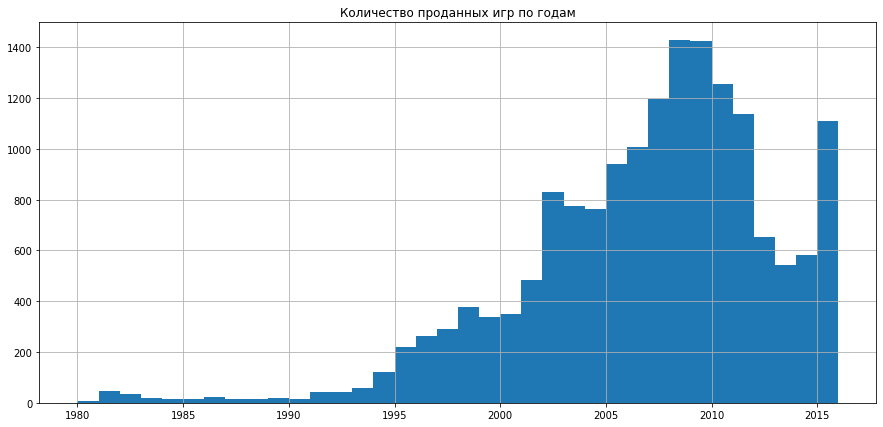

In [9]:
df['year_of_release'].hist(bins=36, grid=True, figsize=(15,7))
plt.title('Количество проданных игр по годам');

После 1995 года начинается значительный рост продаж игр. С 2008 по 2010 было выпущено больше всего игр. Данные за весь период важны для истории. Для прогнозов думаю нужны свежие данные. 

------------------------

Посмотрим как менялись продажи по платформам:

In [10]:
# рейтинг платформ по суммарным продажам
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Получается платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS. Остальные отстают более чем в два раза от последнего из шестерки лидеров.

Построим распределение по годам:

In [11]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index.to_list()

df_top_platform = df[df['platform'].isin(top_platforms)]

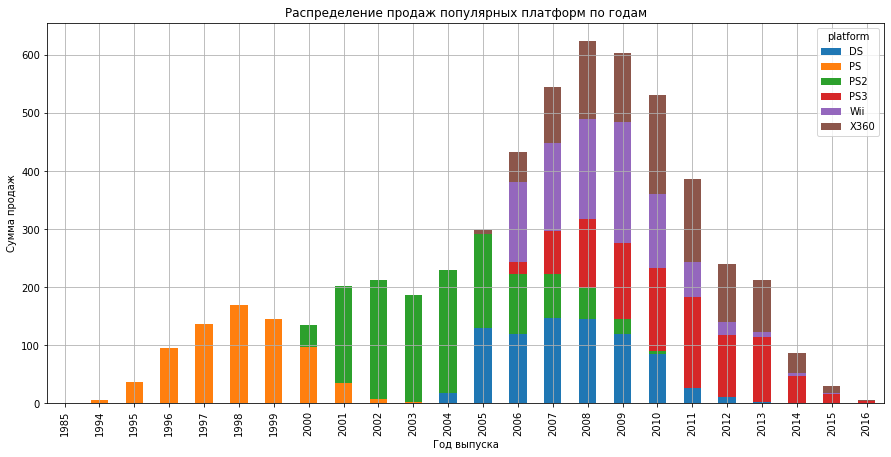

In [12]:

df_top_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.bar(stacked=True, figsize=(15, 7), grid=True)
plt.title('Распределение продаж популярных платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж');

Срок жизни платформ по продажам игр составляет ~10 лет. За этот период появляются новые и исчезают старые платформы.

Также определим актуальный период для прогноза на 2017 год:

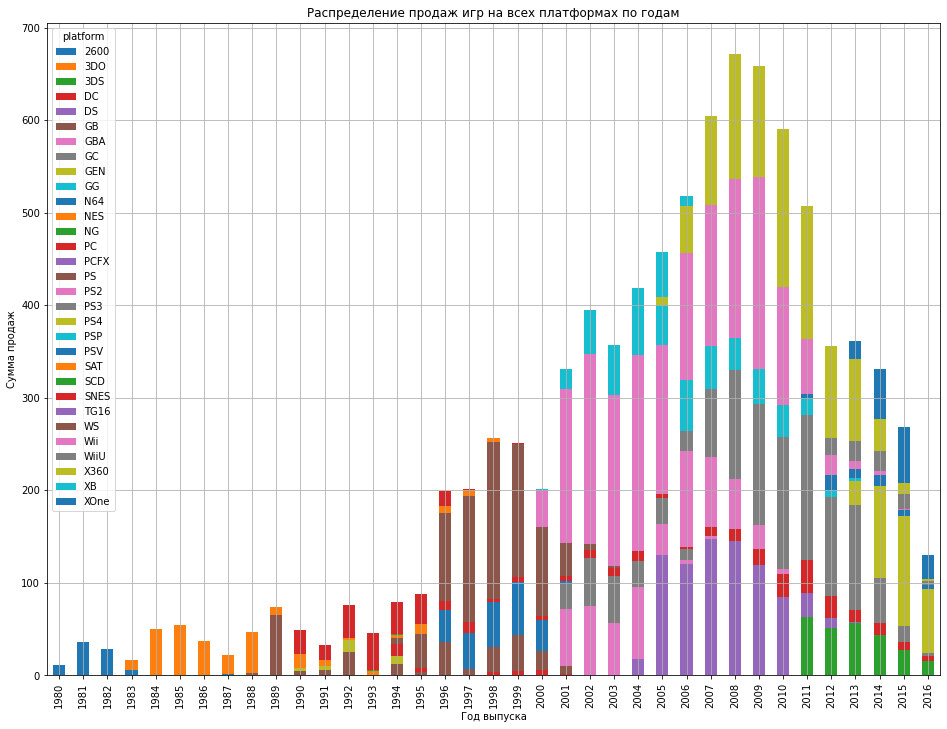

In [13]:
df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.bar(stacked=True, figsize=(16, 12), grid=True)
plt.title('Распределение продаж игр на всех платформах по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж');

На столбчатой диаграмме видно набирающие "обороты" `PS4` и `XOne` начиная с 2013 года. 

Рассмотрим этот период подробнее:

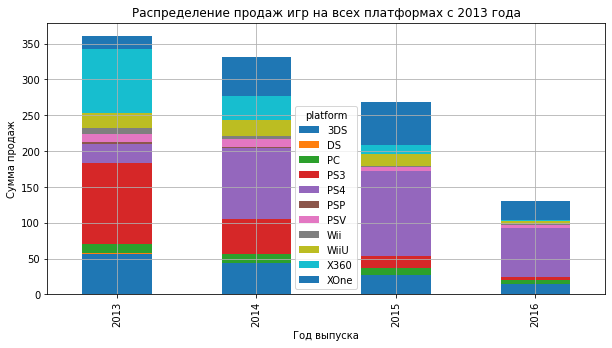

In [14]:
# возьмем актуальный период и построим распределение по нему
df_actual = df.query('2013 <= year_of_release')
df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot.bar(stacked=True, figsize=(10, 5), grid=True)
plt.title('Распределение продаж игр на всех платформах с 2013 года')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж');

Да, так и есть - две платформы потенциально прибыльны. 3DS меньше но все еще может относительно неплохо себя показать. (Просадка в 2016 обусловлена неполными данными)

------------------------

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


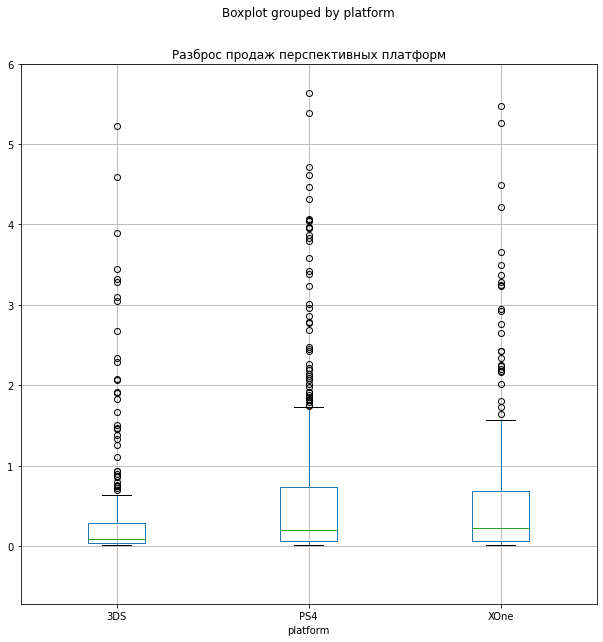

In [15]:
df_platform_pot = df_actual.query("platform == ['PS4', 'XOne', '3DS']")
display(df_platform_pot.groupby('platform')['total_sales'].describe())
df_platform_pot.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.ylim(ymax=6)
plt.title('Разброс продаж перспективных платформ');

`PS4` по всем показателям, кроме медианы, обходит `XOne`. `3DS` несмотря на относительно низкие показатели имеет выброс(хорошую игру) по продажам почти как у `PS4`.

------------------------

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Выберем PS4 т.к. относится к актуальному периоду и имеет хорошие показатели продаж.

#### Зависимость продаж от оценок пользователей для PS4

-0.031957110204556376

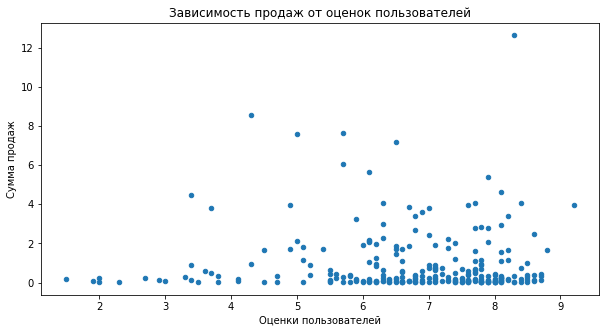

In [16]:
df_actual_ps4 = df_actual[df_actual['platform'] == 'PS4']
df_actual_ps4.plot(x='user_score', y='total_sales', kind='scatter',figsize=(10,5))
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж');
df_actual_ps4['total_sales'].corr(df_actual_ps4['user_score'])

Коэффициент корреляции Пирсона -0.03. Связь между отзывами пользователей и продажами отсутствует или незначительна.

0.4065679020617812

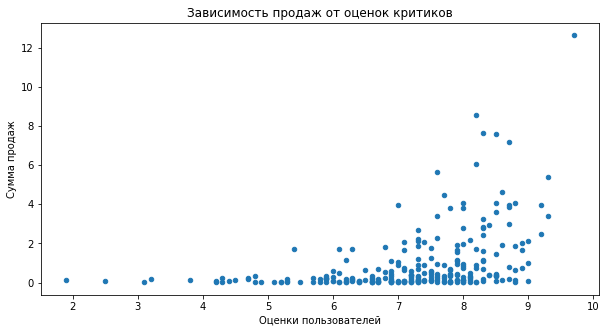

In [17]:
df_actual_ps4.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(10,5))
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж');
df_actual_ps4['total_sales'].corr(df_actual_ps4['critic_score'])

Коэффициент корреляции Пирсона 0.4. Связь между отзывами критиков и продажами присутствует. Визуально выделяются низкие оценки от пользователей даже на топовых играх. Критики такого себе не позволяют либо они тем самым влияют на продажи.


#### Зависимость продаж от оценок пользователей для XOne

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

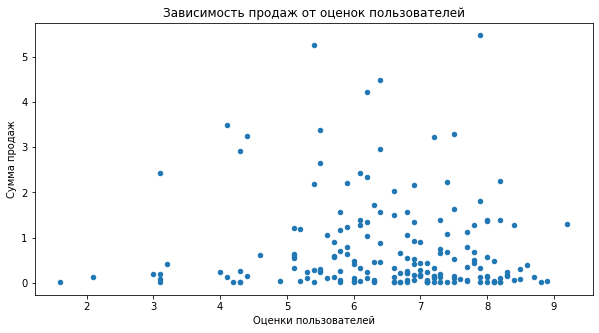

-0.06892505328279412

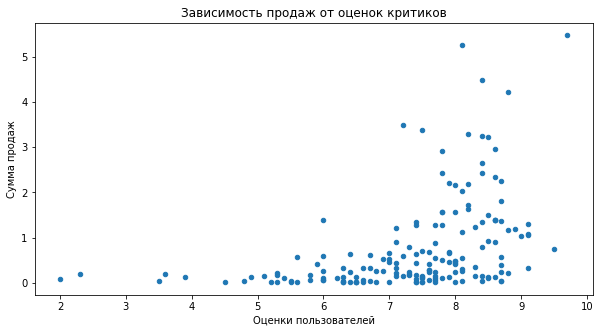

0.4169983280084022

In [18]:
df_actual_xone = df_actual[df_actual['platform'] == 'XOne']
display(df_actual_xone.plot(x='user_score', y='total_sales', kind='scatter',figsize=(10,5)))
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()
display(df_actual_xone['total_sales'].corr(df_actual_xone['user_score']))

df_actual_xone.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(10,5))
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()
df_actual_xone['total_sales'].corr(df_actual_xone['critic_score'])

#### Зависимость продаж от оценок пользователей для 3DS

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

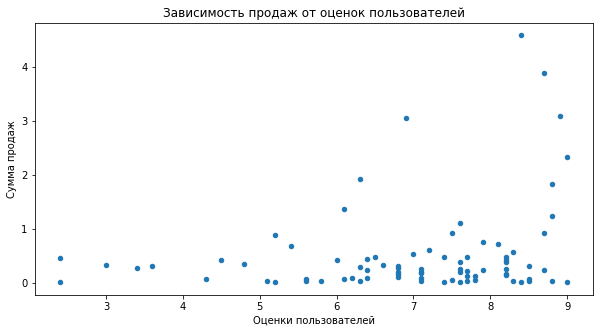

0.24150411773563016

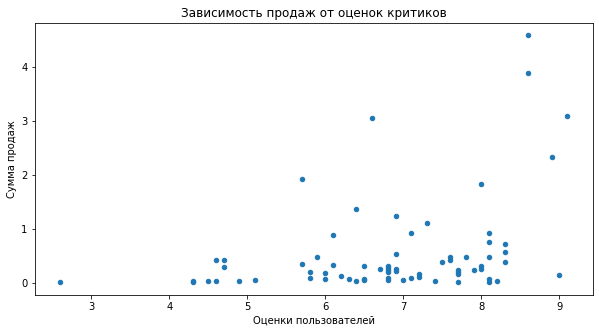

0.3570566142288107

In [19]:
df_actual_3ds = df_actual[df_actual['platform'] == '3DS']
display(df_actual_3ds.plot(x='user_score', y='total_sales', kind='scatter',figsize=(10,5)))
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()
display(df_actual_3ds['total_sales'].corr(df_actual_3ds['user_score']))

df_actual_3ds.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(10,5))
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж')
plt.show()
df_actual_3ds['total_sales'].corr(df_actual_3ds['critic_score'])

На разных платформах зависимость продаж от оценок пользователей сходится для типов консолей. Для портативной приставки коэффициент корреляции Пирсона поучается выше. Зависимость продаж от оценок критиков практически не меняется при смене платформы. Получается влияние оценок критиков на продажи присутствует.

-----------------------

Посмотрим на общее распределение медианных продаж по жанрам:

In [20]:
df_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

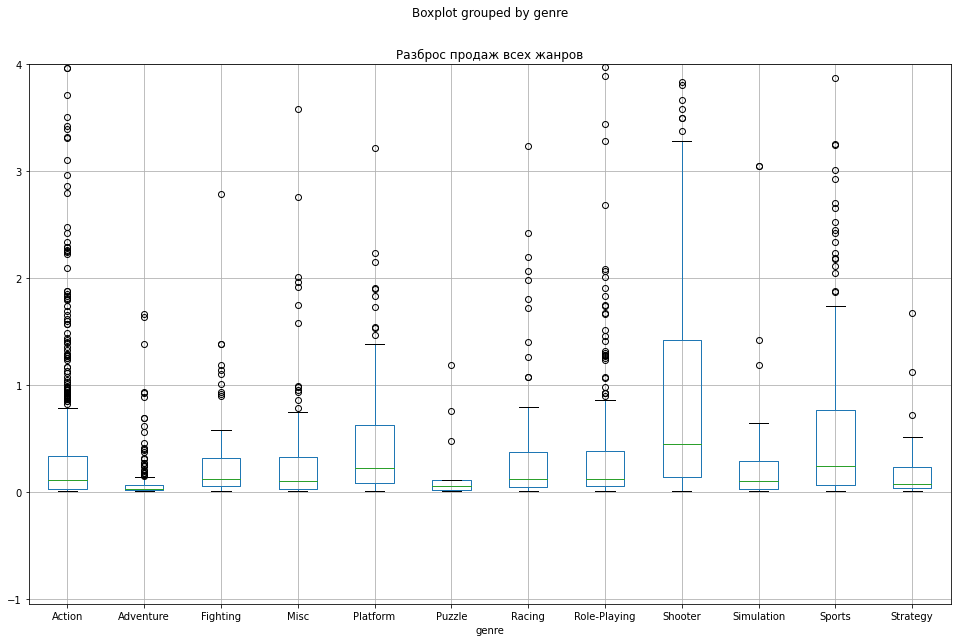

In [21]:
df_actual.boxplot(column='total_sales', by='genre', figsize=(16, 10))
plt.ylim(ymax=4)
plt.title('Разброс продаж всех жанров');

С 2013 года определенно самый прибыльный жанр `Shooter`. `Sports` и `Platform` тоже можно отнести к прибыльным жанрам. 
`Adventure` же имеет самую низкую прибыль.

----------------------------
Срок жизни платформ по заметным продажам игр составляет ~10 лет. За этот период появляются новые и исчезают старые. Перспективными можно считать `PS4`, `XOne`, `3DS`. Коррелляция отзывов и продаж незначительна или практически вовсе отсутствует. Можно точно сказать что влияние оценок критиков на продажи больше чем влияние оценок пользователей. Самый популярный жанр `Action`.

## Составление портрета пользователя каждого региона

Возьмем данные за актуальный период

### Топ 5 платформ.

#### NA

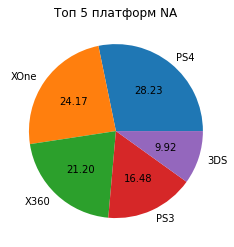

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [22]:
na_platform = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
labels_na_platform = na_platform.index
plt.pie(na_platform, labels=labels_na_platform, autopct='%.2f')
plt.title('Топ 5 платформ NA')
plt.show()
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)


#### EU

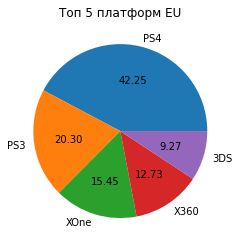

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [23]:
eu_platform = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
labels_eu_platform = eu_platform.index
plt.pie(eu_platform, labels=labels_eu_platform, autopct='%.2f')
plt.title('Топ 5 платформ EU')
plt.show()
df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

#### JP

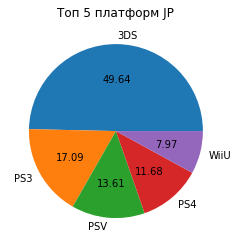

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [24]:
jp_platform = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
labels_jp_platform = jp_platform.index
plt.pie(jp_platform, labels=labels_jp_platform, autopct='%.2f')
plt.title('Топ 5 платформ JP')
plt.show()
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [43]:
def top_5(param, region):
    
    region_platform = df_actual.groupby(param)[region].sum().sort_values(ascending=False).head(5) # делаем группировку, сортируем и отбираем топ-5
    labels = region_platform.index
    
    plt.pie(region_platform, labels=labels, autopct='%.2f') # строим диаграмму
    
    region_name = region[:2].upper() # выделяем название региона
    
    if param == 'platform':
        plt.title(f'Топ 5 платформ {region_name}') # подписываем ось
    elif param == 'genre':
        plt.title(f'Топ 5 жанров {region_name}')
    plt.show()
    
    display(pd.DataFrame(region_platform).reset_index()) # выводим на экран топ-5 в табличном виде

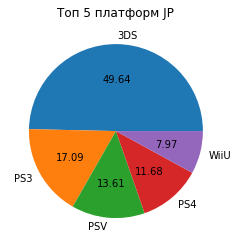

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [42]:
top_5('platform', 'jp_sales')

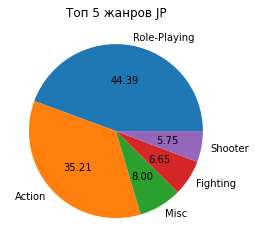

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


In [44]:
top_5('genre', 'jp_sales')

В регионах `NA` и `EU` популярны современные игровые консоли и их предшественники - они составляют 90% приведенного топ5. менее 10% рейтинга остается портативной приставке. В регионе `JP` обратная ситуация - более 70% за портативными приставками и менее 30% за консолями. Продажи в цифрах в `JP` регионе значительно ниже остальных.

### Топ 5 жанров.

#### NA

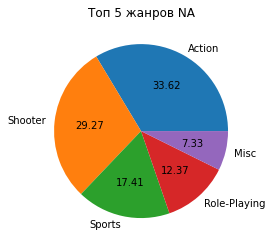

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [25]:
na = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
labels_na = na.index
plt.pie(na, labels=labels_na, autopct='%.2f')
plt.title('Топ 5 жанров NA')
plt.show()
df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

#### EU

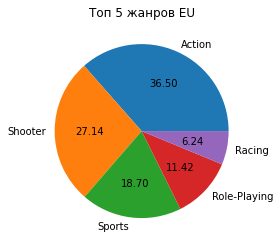

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [26]:
eu = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
labels_eu = eu.index
plt.pie(eu, labels=labels_eu, autopct='%.2f')
plt.title('Топ 5 жанров EU')
plt.show()
df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

#### JP

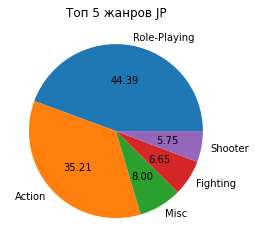

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [27]:
jp = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
labels_jp = jp.index
plt.pie(jp, labels=labels_jp, autopct='%.2f')
plt.title('Топ 5 жанров JP')
plt.show()
df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

В топ 5 жанров регион `JP` снова выделяется другой расстановкой лидеров: `Role-Playing` на первомя когла в лругих лидер `Action`. Продажи в цифрах в `JP` регионе значительно ниже остальных.

### Влияние рейтинга ESRB на продажи

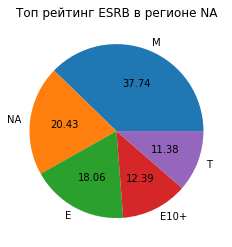

rating
M       165.21
NA       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

In [28]:
df_actual['rating'] = df_actual['rating'].fillna('NA')
na = df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
labels_na = na.index
plt.pie(na, labels=labels_na, autopct='%.2f')
plt.title('Топ рейтинг ESRB в регионе NA')
plt.show()
df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

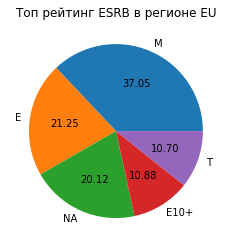

rating
M       145.32
E        83.36
NA       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

In [29]:
eu = df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
labels_eu = eu.index
plt.pie(eu, labels=labels_eu, autopct='%.2f')
plt.title('Топ рейтинг ESRB в регионе EU')
plt.show()
df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

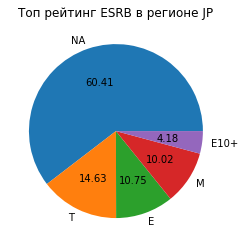

rating
NA      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

In [30]:
jp = df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
labels_jp = jp.index
plt.pie(jp, labels=labels_jp, autopct='%.2f')
plt.title('Топ рейтинг ESRB в регионе JP')
plt.show()
df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

Не знаю влияет ли рейтинг на продажи. Возможно такое распределение связано с возрастом игроков. Рейтинг сопоставим с жанрами игр и игровыми платформами: `NA, EU` - популярны консоли на которых в основном играют в `Action` с рейтингом `M`(17+) в то время как в `JP` - `Role-Playing` на портативных приставках с рейтингом `T`(13+)

## Проверка гипотез

Нулевую гипотезу формулируем так чтобы использовался знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.

Применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind (array1, array2, equal_var)`

Выборки достаточно велики, укажем `equal_var = False`

### Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;
```
H_0: рейтинги платформ Xbox One и PC одинаковые`
H_1: Средние пользовательские рейтинги платформ Xbox One и PC разные`
alpha = 0.05
```

In [31]:
alpha = 0.05

results = st.ttest_ind(df_actual[df_actual['platform'] == 'XOne']['user_score'].dropna(), df_actual[df_actual['platform'] == 'PC']['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. - Не можем отвергнуть

### Средние пользовательские рейтинги жанров `Action` и `Sports` разные;
```
H_0: Средние пользовательские рейтинги жанров Action и Sport одинаковые`
H_1: Средние пользовательские рейтинги жанров Action и Sport разные`
alpha = 0.05
```

In [32]:
alpha = 0.05

results = st.ttest_ind(df_actual[df_actual['genre'] == 'Action']['user_score'].dropna(), df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные. - Отвергнута

## Общий вывод

В данной работе мы изучили исходные данные, выяснили что нуждается в правке и подготовке: привели названия столбцов к нижнему регистру. В столбцах 'Year_of_Release' и 'Critic_Score' сменили тип данных на 'Int64'. Столбец 'User_Score' перевели в тип 'float64', в столбце 'critic_score' разделили значения на 10 и разобрались со значением 'tbd'. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
В ходе исследовательского анализа посмотрели сколько игр выпускалось в разные годы, как менялись продажи по платформам, выбрали платформы с наибольшими сумарными продажами и построили распределение по годам. Выяснили что срок жизни продаж у популярных платформ 10 лет. За этот срок "появляются" новые и "исчезают" старые платформы. Определили актуальный период анализа для прогноза на 2017 год - период с 2013 года, именно тогда появляются заметные продажи на платформы: PS4, XOne, 3DS их определим как потенциально перспективные. 
У 3DS продажи в основном не такие большие как у PS4 и Xone зато хватает "экземпляров" на уровне PS4.
Оценки критиков влияют на продажи с коффициентом коррелляции Пирсона 0.4.
Самые прибыльные жанры по медиане продаж и количеству: Shooter, Sports, Platform.

Портрет пользователя региона NA - играет на PS4, XOne, X360, PS3, 3DS. В жанр: Action, Shooter, Sports, Role-Playing, Misc. С рейтингом ESRB: M, NA, E, E10+, T.

Портрет пользователя региона EU - играет на PS4, PS3, XOne, X360, 3DS. В жанр: Action, Shooter, Sports, Role-Playing, Racing. С рейтингом ESRB: M, E, NA, E10+, T.

Портрет пользователя региона JP - играет на 3DS, PS3, PSV, PS4, WiiU. В жанр: Role-Playing, Action, Misc, Fighting, Shooter. С рейтингом ESRB: NA, T, E, M, E10+.

Сформулировали и проверили гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. - подтвердилась;  Средние пользовательские рейтинги жанров Action и Sports разные. - подтвердилась.

Рекомендации отделу маркетинга:
Перспективные для 2017 являются платформы: PS4, XOne и в меньшей степени 3DS - у них есть достаточно времени для хороших продаж. Игры - соответствующие портрету пользователя региона. Также необходимо полижительное влияние на оценки критиков.